In [ ]:
import json
from datasets import load_dataset

# Load the ASSET dataset
dataset = load_dataset("asset")

# Check splits
print(dataset)  # validation and test only

# Function to save JSON
def save_json(split_data, filename):
    with open(filename, "w") as f:
        json.dump([dict(item) for item in split_data], f, indent=2)

# Save validation as training (you can rename as train if you want)
save_json(dataset["validation"], "asset_train.json")  # using validation as train
save_json(dataset["test"], "asset_test.json")

print("JSON files saved!")

DatasetDict({
    validation: Dataset({
        features: ['original', 'simplifications'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['original', 'simplifications'],
        num_rows: 359
    })
})
JSON files saved!


In [ ]:
# Load JSON file
with open("asset_train.json", "r") as f:
    data = json.load(f)

# Print the first 2 entries
for i in range(2):
    print(json.dumps(data[i], indent=2))

{
  "original": "Adjacent counties are Marin (to the south), Mendocino (to the north), Lake (northeast), Napa (to the east), and Solano and Contra Costa (to the southeast).",
  "simplifications": [
    "countries next to it are Marin, Mendocino, Lake, Napa, Solano, and Contra Costa.",
    "Nearby counties are Marin, Mendocino, Lake, Napa, and Solano and Contra Costa.",
    "Adjacent counties are Marin, Mendocino, Lake, Napa, Solano and Contra Costa.",
    "Neighboring counties are Marin, Mendocino, Lake, Napa, Solano, and Contra Costa.",
    "Adjacent counties are Marin (south), Mendocino (north), Lake (northeast), and Napa (east). Solano and Contra Costa are to the southeast.",
    "Counties next to it are Marin (to the south), Mendocino (to the north), Lake (northeast), Napa (to the east), and Solano and Contra Costa (to the southeast).",
    "Marin, Mendocino, Lake, Napa, Solano, and Contra Costa counties are next to it.",
    "Adjacent counties are Marin, Mendocino, Lake, Napa, Sol

In [ ]:
print(f"Number of entries: {len(data)}")
print(f"Keys of first entry: {data[0].keys()}")
print(f"Original sentence: {data[0]['original']}")
print(f"Simplifications: {data[0]['simplifications']}")

Number of entries: 2000
Keys of first entry: dict_keys(['original', 'simplifications'])
Original sentence: Adjacent counties are Marin (to the south), Mendocino (to the north), Lake (northeast), Napa (to the east), and Solano and Contra Costa (to the southeast).
Simplifications: ['countries next to it are Marin, Mendocino, Lake, Napa, Solano, and Contra Costa.', 'Nearby counties are Marin, Mendocino, Lake, Napa, and Solano and Contra Costa.', 'Adjacent counties are Marin, Mendocino, Lake, Napa, Solano and Contra Costa.', 'Neighboring counties are Marin, Mendocino, Lake, Napa, Solano, and Contra Costa.', 'Adjacent counties are Marin (south), Mendocino (north), Lake (northeast), and Napa (east). Solano and Contra Costa are to the southeast.', 'Counties next to it are Marin (to the south), Mendocino (to the north), Lake (northeast), Napa (to the east), and Solano and Contra Costa (to the southeast).', 'Marin, Mendocino, Lake, Napa, Solano, and Contra Costa counties are next to it.', 'Adja

In [ ]:
# Load JSON file
with open("asset_test.json", "r") as f:
    data2 = json.load(f)

# Print the first 2 entries
for i in range(2):
    print(json.dumps(data2[i], indent=2))

{
  "original": "One side of the armed conflicts is composed mainly of the Sudanese military and the Janjaweed, a Sudanese militia group recruited mostly from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.",
  "simplifications": [
    "On one side of the conflicts are the Sudanese military and the Janjaweed, a Sudanese militia group.  They are mostly recruited from the Afro-Arab Abbala tribes.",
    "One side of the armed conflicts is composed mainly of the Sudanese military and the Janjaweed. The Janjaweed are a Sudanese militia group recruited mostly from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.",
    "One side of the armed conflicts is mainly the Sudanese military and the Janjaweed militia group.",
    "One side of the war is made up of the Sudanese military and the Janjaweed, a Sudanese militia group from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.",
    "One side of the war is mainly made up of the Sudan

In [ ]:
print(f"Number of entries: {len(data2)}")
print(f"Keys of first entry: {data2[0].keys()}")
print(f"Original sentence: {data2[0]['original']}")
print(f"Simplifications: {data2[0]['simplifications']}")

Number of entries: 359
Keys of first entry: dict_keys(['original', 'simplifications'])
Original sentence: One side of the armed conflicts is composed mainly of the Sudanese military and the Janjaweed, a Sudanese militia group recruited mostly from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.
Simplifications: ['On one side of the conflicts are the Sudanese military and the Janjaweed, a Sudanese militia group.  They are mostly recruited from the Afro-Arab Abbala tribes.', 'One side of the armed conflicts is composed mainly of the Sudanese military and the Janjaweed. The Janjaweed are a Sudanese militia group recruited mostly from the Afro-Arab Abbala tribes of the northern Rizeigat region in Sudan.', 'One side of the armed conflicts is mainly the Sudanese military and the Janjaweed militia group.', 'One side of the war is made up of the Sudanese military and the Janjaweed, a Sudanese militia group from the Afro-Arab Abbala tribes of the northern Rizeigat region i

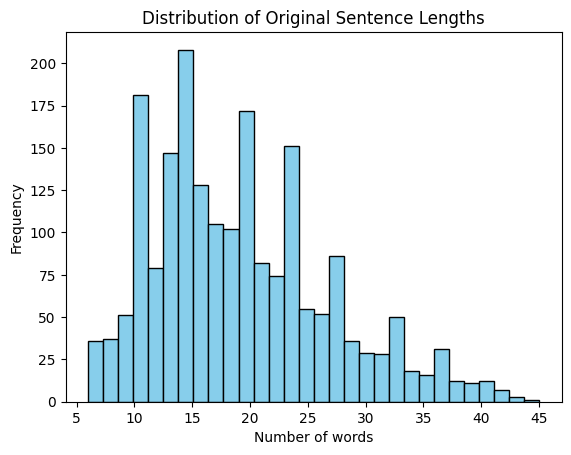

In [ ]:
import matplotlib.pyplot as plt

# Load JSON
with open("asset_train.json") as f:
    data = json.load(f)

# Count words in original sentences
orig_lengths = [len(item["original"].split()) for item in data]

plt.hist(orig_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Original Sentence Lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

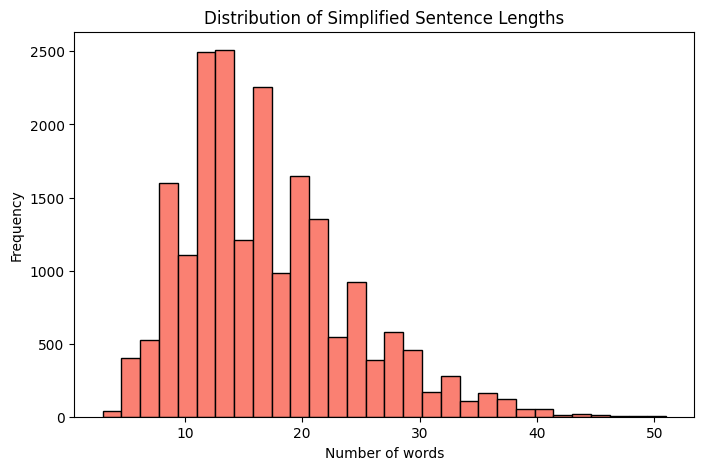

In [ ]:
# Flatten all simplifications
all_simplifications = [s for item in data for s in item["simplifications"]]
simp_lengths = [len(s.split()) for s in all_simplifications]

plt.figure(figsize=(8,5))
plt.hist(simp_lengths, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Simplified Sentence Lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

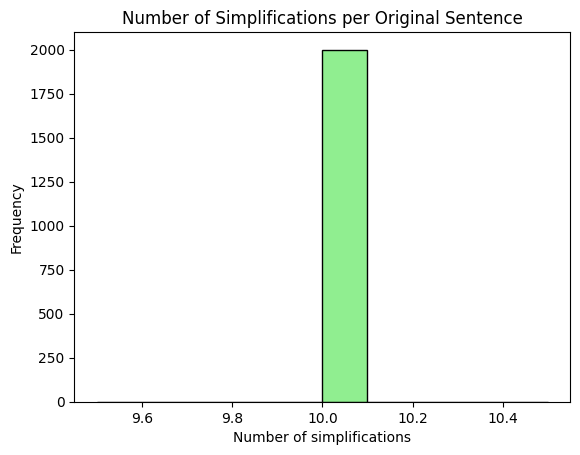

In [ ]:
num_simplifications = [len(item["simplifications"]) for item in data]

plt.hist(num_simplifications, bins=10, color='lightgreen', edgecolor='black')
plt.title("Number of Simplifications per Original Sentence")
plt.xlabel("Number of simplifications")
plt.ylabel("Frequency")
plt.show()

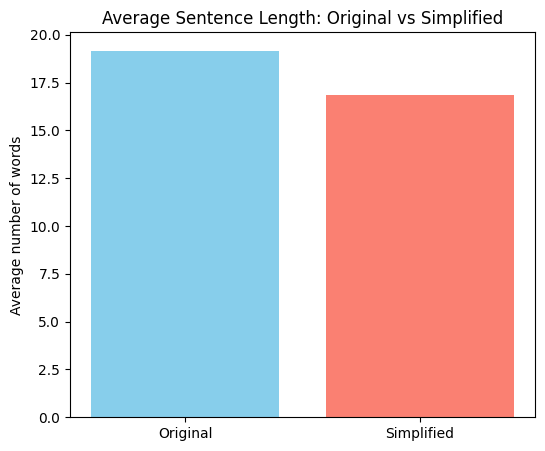

Average original sentence length: 19.17 words
Average simplified sentence length: 16.83 words


In [ ]:
avg_orig_len = sum(orig_lengths) / len(orig_lengths)
avg_simp_len = sum(simp_lengths) / len(simp_lengths)

plt.figure(figsize=(6,5))
plt.bar(['Original', 'Simplified'], [avg_orig_len, avg_simp_len], color=['skyblue','salmon'])
plt.ylabel("Average number of words")
plt.title("Average Sentence Length: Original vs Simplified")
plt.show()

print(f"Average original sentence length: {avg_orig_len:.2f} words")
print(f"Average simplified sentence length: {avg_simp_len:.2f} words")